#Optimisasi Klasifikasi Kanker Payudara dengan SVM menggunakan Algoritma PSO

In [ ]:
!pip install pyswarms


## Import data langsung dari repository uci machine learning menggunakan library ucimlrepo

In [ ]:
! pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pyswarms as ps
from sklearn.impute import SimpleImputer

# Load the Breast Cancer Wisconsin (Prognostic) dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_prognostic = fetch_ucirepo(id=16)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_prognostic.data.features
y = breast_cancer_wisconsin_prognostic.data.targets

# metadata
print(breast_cancer_wisconsin_prognostic.metadata)

# variable information
print(breast_cancer_wisconsin_prognostic.variables)

{'uci_id': 16, 'name': 'Breast Cancer Wisconsin (Prognostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/16/breast+cancer+wisconsin+prognostic', 'data_url': 'https://archive.ics.uci.edu/static/public/16/data.csv', 'abstract': 'Prognostic Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 198, 'num_features': 33, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Outcome'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1995, 'last_updated': 'Sun Jan 14 2024', 'dataset_doi': '10.24432/C5GK50', 'creators': ['William Wolberg', 'W. Street', 'Olvi Mangasarian'], 'intro_paper': None, 'additional_info': {'summary': 'Each record represents follow-up data for one breast cancer case.  These are consecutive patients seen by Dr. Wolberg since 1984, and include only those cases exhibiting invasive brea

In [ ]:
df=breast_cancer_wisconsin_prognostic.data.original#menampilkan 5 data teratas
df

,ID,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status,Outcome
0,119513,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,...,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0,N
1,8423,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0,N
2,842517,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,...,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0,N
3,843483,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0,N
4,843584,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,...,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0,N
194,943471,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,...,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0,N
195,94547,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,...,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0,N
196,947204,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,...,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,NaN,R


## Data Cleaning

In [ ]:
pd.isnull(df).sum()

ID                    0
Time                  0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
tumor_size            0
lymph_node_status     4
Outcome               0
dtype: int64

In [ ]:
df['lymph_node_status'].fillna(df['lymph_node_status'].mean(), inplace=True)

In [ ]:
pd.isnull(df).sum()

ID                    0
Time                  0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
tumor_size            0
lymph_node_status     0
Outcome               0
dtype: int64

## Optimasi Parameter dengan PSO

In [ ]:
# Extract features (X) and target (y) from the DataFrame
X = df.drop(columns=["Outcome"])
y = df["Outcome"] # Convert diagnosis to binary labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
def fitness_function(params):
    c_value, gamma_value = params
    clf = SVC(C=c_value, gamma=gamma_value, kernel='linear', random_state=42)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return 1 - accuracy  # PSO minimizes the fitness function, so we use 1 - accuracy

In [ ]:
import random
class Particle:
    def __init__(self, dimensions, lower_bound, upper_bound):
        self.position = [random.uniform(lower_bound, upper_bound) for _ in range(dimensions)]
        self.velocity = [random.uniform(-1, 1) for _ in range(dimensions)]
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

    def update_velocity(self, global_best_position, inertia_weight, cognitive_weight, social_weight):
        for i in range(len(self.velocity)):
            cognitive_component = cognitive_weight * (self.best_position[i] - self.position[i])
            social_component = social_weight * (global_best_position[i] - self.position[i])
            self.velocity[i] = inertia_weight * self.velocity[i] + cognitive_component + social_component

    def update_position(self, lower_bound, upper_bound):
        self.position = [max(min(self.position[i] + self.velocity[i], upper_bound), lower_bound) for i in range(len(self.position))]

    def update_best(self, fitness_func):
        current_fitness = fitness_func(self.position)
        if current_fitness < self.best_fitness:
            self.best_fitness = current_fitness
            self.best_position = self.position.copy()

def pso_classification(fitness_func, dimensions, lower_bound, upper_bound, num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight):
    particles = [Particle(dimensions, lower_bound, upper_bound) for _ in range(num_particles)]
    global_best_position = None
    global_best_fitness = float('inf')

    for _ in range(max_iterations):
        for particle in particles:
            particle.update_best(fitness_func)
            if particle.best_fitness < global_best_fitness:
                global_best_fitness = particle.best_fitness
                global_best_position = particle.best_position

        for particle in particles:
            particle.update_velocity(global_best_position, inertia_weight, cognitive_weight, social_weight)
            particle.update_position(lower_bound, upper_bound)

    return global_best_position, global_best_fitness

# Define PSO parameters (gunakan nilai yang sama setiap kali Anda jalankan PSO)
dimensions = 2
lower_bound = 0.1
upper_bound = 10
num_particles = 30
max_iterations = 50
inertia_weight = 0.5  # Fixed inertia weight
cognitive_weight = 1.5  # Fixed cognitive weight
social_weight = 1.5  # Fixed social weight



# Run PSO
best_Parameter, best_fitness = pso_classification(fitness_function, dimensions, lower_bound, upper_bound, num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight)

print("Best Parameter:", best_Parameter)
print("Best Fitness:", best_fitness)


Best Parameter: [3.0901809489681082, 4.991246905652021]
Best Fitness: 0.008209220217453161


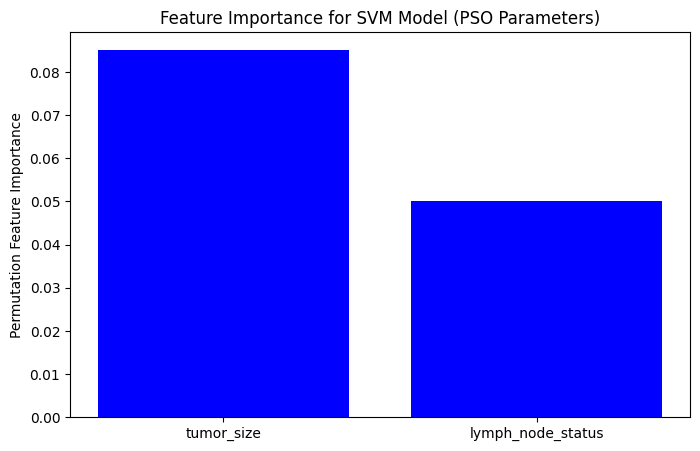

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Definisi data dan feature names (asumsi X_train, X_test, y_train, y_test sudah ada)
feature_names = ['ID', 'Time', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
                 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1',
                 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2',
                 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3',
                 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3',
                 'concave_points3', 'symmetry3', 'fractal_dimension3', 'tumor_size', 'lymph_node_status']

# Hasil perhitungan PSO untuk parameter C dan gamma
best_C = 3.0901809489681082
best_gamma = 4.991246905652021

# Latih model SVM dengan parameter terbaik dari PSO
model = SVC(C=best_C, gamma=best_gamma)
model.fit(X_train, y_train)

# Hitung Permutation Feature Importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

# Filter feature importance hanya untuk fitur tumor_size dan lymph_node_status
selected_features = ['tumor_size', 'lymph_node_status']
selected_importances = [result.importances_mean[result.importances_mean.shape[0] - 2 + idx] for idx in range(len(selected_features))]

# Plot feature importance untuk fitur yang dipilih (bar plot vertikal)
plt.figure(figsize=(8, 5))
plt.bar(selected_features, selected_importances, color='blue')
plt.ylabel('Permutation Feature Importance')
plt.title('Feature Importance for SVM Model (PSO Parameters)')
plt.show()


In [ ]:
# Mengimpor library yang diperlukan
import numpy as np  # NumPy menyediakan dukungan untuk array, matriks, dan fungsi matematika
import pandas as pd  # Pandas digunakan untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Matplotlib adalah library untuk membuat visualisasi grafik
from matplotlib.colors import ListedColormap  # ListedColormap digunakan untuk memberi warna pada plot
import seaborn as sns  # Seaborn adalah library visualisasi data statistik berbasis Matplotlib
from sklearn.preprocessing import LabelEncoder  # LabelEncoder digunakan untuk mengkodekan variabel kategori ke format numerik
from sklearn.preprocessing import StandardScaler  # StandardScaler digunakan untuk standarisasi fitur dengan menghapus rata-rata dan penskalaan menjadi varians satuan
from sklearn.model_selection import train_test_split  # train_test_split digunakan untuk membagi dataset menjadi set pelatihan dan pengujian
from sklearn.naive_bayes import GaussianNB  # Implementasi klasifikasi Gaussian Naive Bayes di scikit-learn
from sklearn import metrics  # Berbagai metrik untuk mengevaluasi model machine learning
from sklearn.metrics import accuracy_score  # Metrik akurasi
from sklearn.metrics import classification_report  # Laporan klasifikasi dengan presisi, recall, dan skor F1
from sklearn.metrics import precision_recall_curve  # Kurva Presisi-Recall untuk mengevaluasi kualitas keluaran klasifikasi
from sklearn.metrics import confusion_matrix  # Matriks kebingungan untuk mengevaluasi kinerja algoritma klasifikasi
from sklearn.metrics import f1_score  # Skor F1, metrik yang menggabungkan presisi dan recall

In [ ]:
# Memilih kolom-kolom dalam DataFrame 'df' yang memiliki tipe data bukan numerik (kategori)
data_column_category = df.select_dtypes(exclude=[np.number]).columns

# Menampilkan daftar kolom-kolom kategori
data_column_category

Index(['Outcome'], dtype='object')

In [ ]:
# Memilih hanya kolom-kolom dengan tipe data bukan numerik (kategori) dari DataFrame 'df' dan menampilkan lima baris pertama
df[data_column_category].head()

,Outcome
0,N
1,N
2,N
3,N
4,R


In [ ]:
# Mengimpor LabelEncoder dari library scikit-learn
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding untuk setiap kolom kategori dalam DataFrame 'df'
for i in data_column_category:
    df[i] = label_encoder.fit_transform(df[i])

# Menampilkan hasil label encoding untuk lima baris pertama dari DataFrame 'df'
print("Label Encoded Data: ")
df.head()

Label Encoded Data: 


,ID,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status,Outcome
0,119513,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0,0
1,8423,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0,0
2,842517,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0,0
3,843483,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0,0
4,843584,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0,1


In [ ]:
df['Outcome'].unique()

array([0, 1])

In [ ]:
df.shape

(198, 35)

### 3. Data Analysis / Preprocessing

b. Deskripsi data

In [ ]:
# Memanggil metode describe() pada DataFrame 'df' untuk menghasilkan ringkasan statistik deskriptif dari data
df.describe()

,ID,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status,Outcome
count,1.980000e+02,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1.990469e+06,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,...,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475,3.211340,0.237374
std,2.889025e+06,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,...,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964,5.423363,0.426552
min,8.423000e+03,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,...,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000,0.000000
25%,8.557452e+05,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,...,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000,0.000000,0.000000
50%,8.863390e+05,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,...,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000,1.000000,0.000000
75%,9.279958e+05,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,...,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000,4.000000,0.000000
max,9.411300e+06,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,...,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000,1.000000


In [ ]:
# Menghitung matriks korelasi untuk semua kolom numerik dalam DataFrame 'df'
korelasi = df.corr()

# Menampilkan matriks korelasi
korelasi

,ID,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status,Outcome
ID,1.000000,-0.135299,0.087392,0.037650,0.088027,0.070117,-0.039803,0.059505,0.051946,0.074368,...,0.008451,-0.057241,0.005048,0.043288,0.059702,-0.053920,0.003154,-0.132809,-0.080787,-0.031466
Time,-0.135299,1.000000,-0.344722,-0.264671,-0.346080,-0.344031,0.164793,0.010000,-0.139475,-0.171841,...,-0.253930,0.212769,0.120516,0.009546,-0.026541,0.247678,0.288715,-0.133355,-0.125976,-0.351326
radius1,0.087392,-0.344722,1.000000,0.143456,0.995933,0.992855,-0.158239,0.159017,0.469518,0.664010,...,0.891489,-0.372894,-0.150712,0.038952,0.357869,-0.232142,-0.414340,0.172102,0.066441,0.174124
texture1,0.037650,-0.264671,0.143456,1.000000,0.142033,0.140440,-0.192262,-0.039803,0.037165,0.006687,...,0.117467,-0.113308,-0.006467,0.013635,-0.069921,-0.186850,-0.085847,0.027073,0.042438,-0.064295
perimeter1,0.088027,-0.346080,0.995933,0.142033,1.000000,0.990699,-0.102912,0.236721,0.533194,0.712766,...,0.889344,-0.331667,-0.092041,0.096790,0.410000,-0.206949,-0.364022,0.166489,0.067700,0.176486
area1,0.070117,-0.344031,0.992855,0.140440,0.990699,1.000000,-0.141470,0.163176,0.475862,0.667530,...,0.914166,-0.345111,-0.141358,0.046641,0.365026,-0.234294,-0.395026,0.174491,0.067557,0.189893
smoothness1,-0.039803,0.164793,-0.158239,-0.192262,-0.102912,-0.141470,1.000000,0.666559,0.623867,0.545734,...,-0.106691,0.745400,0.447849,0.499438,0.531015,0.308964,0.535751,-0.084376,0.024291,0.020778
compactness1,0.059505,0.010000,0.159017,-0.039803,0.236721,0.163176,0.666559,1.000000,0.836015,0.716438,...,0.168275,0.452067,0.764824,0.743333,0.761044,0.429953,0.611315,-0.060199,0.002742,0.000798
concavity1,0.051946,-0.139475,0.469518,0.037165,0.533194,0.475862,0.623867,0.836015,1.000000,0.909990,...,0.421021,0.319247,0.483300,0.702673,0.767571,0.212976,0.302868,-0.010244,0.059668,0.054893
concave_points1,0.074368,-0.171841,0.664010,0.006687,0.712766,0.667530,0.545734,0.716438,0.909990,1.000000,...,0.604029,0.174917,0.286599,0.471429,0.764803,0.089804,0.101327,0.050040,0.055983,0.118224


e. Correlation matrix

<Axes: >

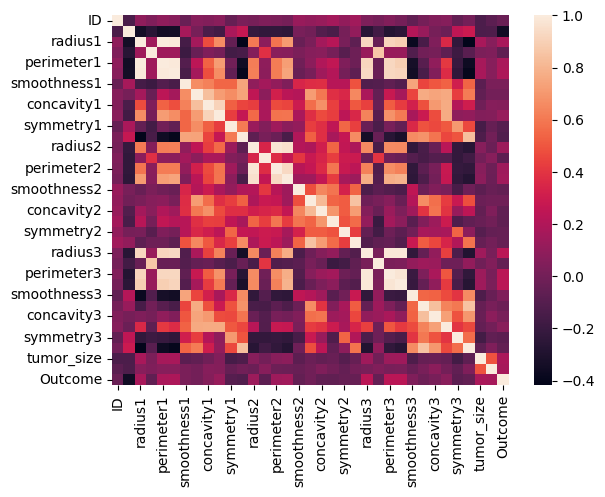

In [ ]:
# Membuat heatmap (peta panas) untuk visualisasi matriks korelasi
sns.heatmap(korelasi)

c. Distribusi data

<ipython-input-174-3226a0c31013>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['texture1'])


<Axes: xlabel='texture1', ylabel='Density'>

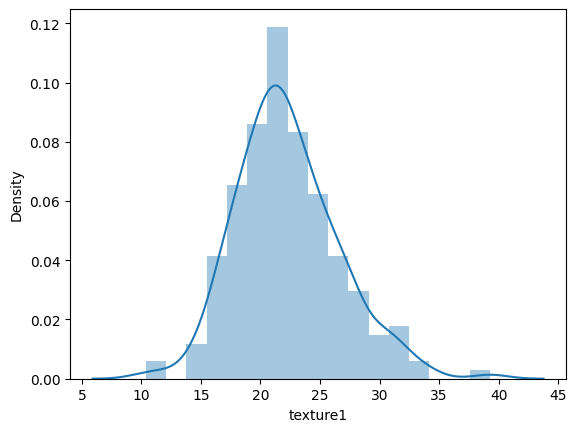

In [ ]:
# Membuat distribusi plot (distplot) untuk kolom 'EstimatedSalary' dalam DataFrame 'df'
sns.distplot(df['texture1'])

### 1. Import libraries

In [ ]:
from sklearn.svm import SVC#import SVCn

### 4. Split data

a. Variabel Independen / Dependen

In [ ]:
# Memilih features (variabel independen) dan target (variabel dependen) dari DataFrame 'df'
x = df.iloc[:, [33,34]].values  # Memilih semua kolom yang paling relevan
y = df.iloc[:, -1].values  # Memilih hanya kolom terakhir sebagai target

b. Train / Test Split

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Membagi dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
# Menggunakan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Melatih model SVM dengan pembobotan kelas
# Membuat objek classifier dengan kernel linear dan random_state 0
classifier = SVC(kernel='linear', class_weight='balanced', random_state=0)
classifier.fit(X_train_resampled, y_train_resampled)

SVC(class_weight='balanced', kernel='linear', random_state=0)

### 6. Train model

### 7. Predict result / Score model

In [ ]:
# Melakukan prediksi menggunakan model yang telah dilatih pada set pengujian

# Menerapkan model yang telah dilatih untuk membuat prediksi pada set pengujian
y_pred = classifier.predict(X_test)


### 8. Evaluasi Model

### a. Akurasi

In [ ]:
# Menghitung akurasi dengan membandingkan nilai yang diprediksi (y_pred) dengan nilai sebenarnya (y_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.85

### b. Classification report

In [ ]:
print(f'Classification Report : \n{classification_report(y_test, y_pred)}') #klasifikasi report

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        37
           1       0.33      1.00      0.50         3

    accuracy                           0.85        40
   macro avg       0.67      0.92      0.71        40
weighted avg       0.95      0.85      0.88        40



### d. Confusion matrix

<Axes: >

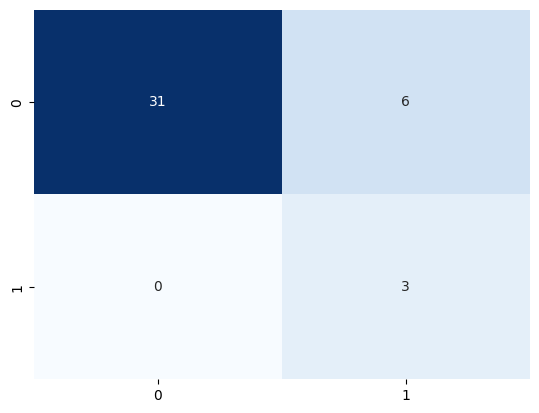

In [ ]:
# Membuat matriks konfusi dengan membandingkan nilai sebenarnya (y_test) dan nilai yang diprediksi (y_pred)
cm = confusion_matrix(y_test, y_pred)
# Menampilkan heatmap matriks konfusi dengan anotasi, format angka, peta warna, dan tanpa color bar
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

### e. Precision-Recall curve

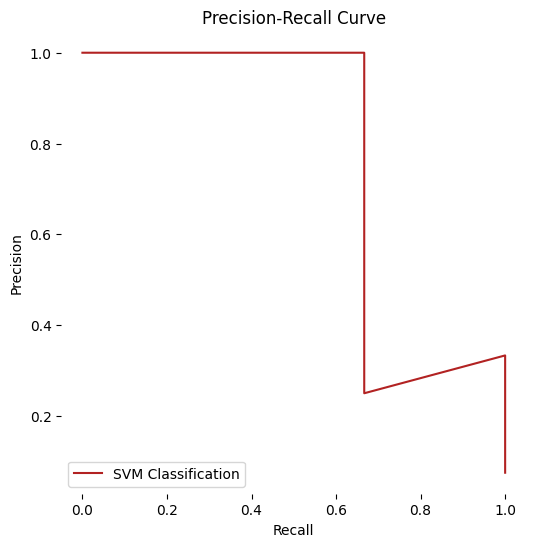

In [ ]:
# Menggantikan klasifier dengan SVM classifier Anda
y_pred_proba = classifier.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Membuat plot Precision-Recall Curve
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(recall, precision, label='SVM Classification', color='firebrick')  # Ganti label dan warna sesuai kebutuhan
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend()

# Menampilkan plot
plt.show()


### f. AUC/ROC curve

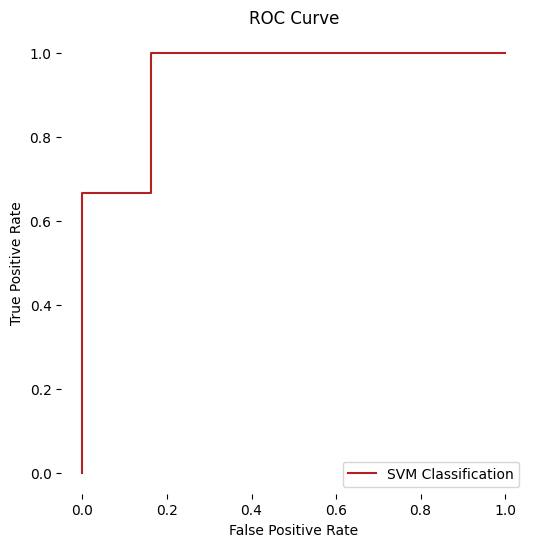

In [ ]:
# Menghitung nilai fungsi keputusan dan menghitung ROC Curve untuk model SVM
y_pred_proba_svm = classifier.decision_function(X_test)
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(y_test, y_pred_proba_svm)

# Membuat dan menampilkan ROC Curve
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr_svm, tpr_svm, label='SVM Classification', color='firebrick')  # Ganti label dan warna sesuai kebutuhan
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

# Menampilkan plot
plt.show()


### 9. Visualization predictions

<ipython-input-196-5f28a2764ec7>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_resampled[y_train_resampled == j, 0], X_train_resampled[y_train_resampled == j, 1],


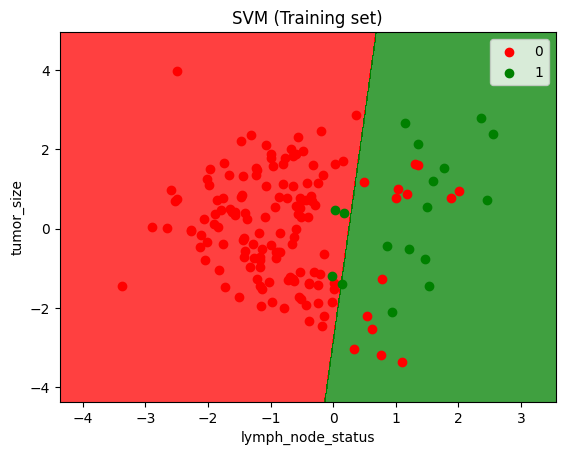

In [ ]:
# Memilih set pelatihan sebagai data yang akan divisualisasikan
X_train_resampled, y_train_resampled = X_train, y_train

# Membuat meshgrid untuk membuat area visualisasi
X1, X2 = np.meshgrid(np.arange(start = X_train_resampled[:, 0].min() - 1, stop = X_train_resampled[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train_resampled[:, 1].min() - 1, stop = X_train_resampled[:, 1].max() + 1, step = 0.01))

# Membuat plot kontur untuk menampilkan batas keputusan
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Menentukan batas sumbu x dan y
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Menampilkan titik data pada plot
for i, j in enumerate(np.unique(y_train_resampled)):
    plt.scatter(X_train_resampled[y_train_resampled == j, 0], X_train_resampled[y_train_resampled == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

# Menambahkan judul, label sumbu x dan y, dan legenda
plt.title('SVM (Training set)')
plt.xlabel('lymph_node_status')
plt.ylabel('tumor_size')
plt.legend()

# Menampilkan plot
plt.show()


<ipython-input-197-eb6659dff3f1>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_resampled[y_train_resampled == j, 0], X_train_resampled[y_train_resampled == j, 1],


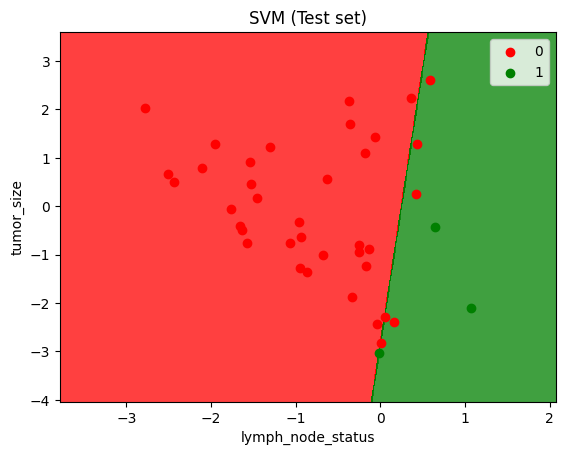

In [ ]:
# Memilih set pengujian sebagai data yang akan divisualisasikan
X_train_resampled, y_train_resampled = X_test, y_test

# Membuat meshgrid untuk membuat area visualisasi
X1, X2 = np.meshgrid(np.arange(start = X_train_resampled[:, 0].min() - 1, stop = X_train_resampled[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train_resampled[:, 1].min() - 1, stop = X_train_resampled[:, 1].max() + 1, step = 0.01))

# Membuat plot kontur untuk menampilkan batas keputusan pada set pengujian
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Menentukan batas sumbu x dan y
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Menampilkan titik data pada set pengujian pada plot
for i, j in enumerate(np.unique(y_train_resampled)):
    plt.scatter(X_train_resampled[y_train_resampled == j, 0], X_train_resampled[y_train_resampled == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

# Menambahkan judul, label sumbu x dan y, dan legenda
plt.title('SVM (Test set)')
plt.xlabel('lymph_node_status')
plt.ylabel('tumor_size')
plt.legend()

# Menampilkan plot
plt.show()


### 10. Example

In [ ]:
# Melakukan prediksi kelas untuk data baru yang telah dinormalisasi
print(classifier.predict(sc.transform([[1, 32]])))

[0]
